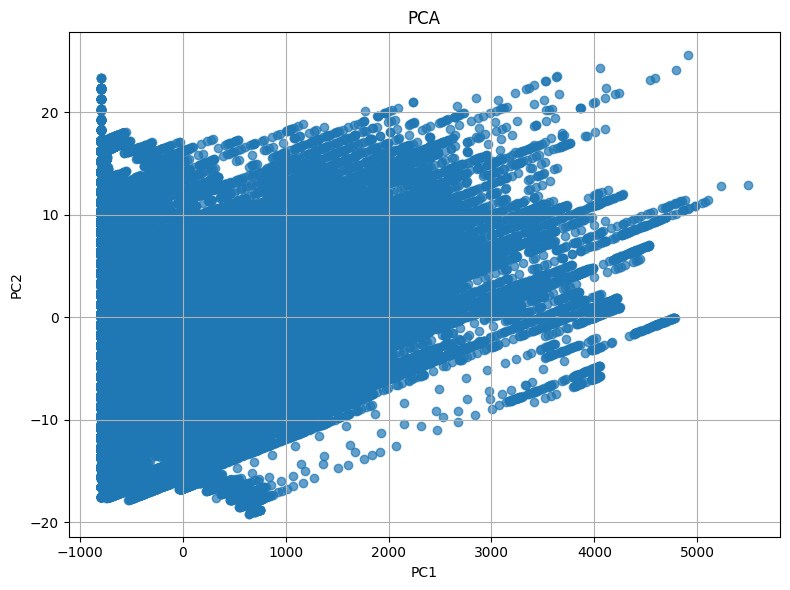

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Schritt 1: Daten zentrieren (Mittelwert subtrahieren)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Schritt 2: Kovarianzmatrix berechnen
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Schritt 3: Eigenwerte und Eigenvektoren berechnen
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Schritt 4: Sortieren der Eigenvektoren nach absteigenden Eigenwerten
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]
        eigenvalues = eigenvalues[sorted_indices]

        # Schritt 5: Auswahl der Top-n Komponenten
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    @staticmethod
    def load_csv(filepath, drop_columns=None):
        df = pd.read_csv(filepath)
        if drop_columns:
            df = df.drop(columns=drop_columns)
        return df.values


def plot_pca_2d(transformed_data, labels=None, title="PCA Projektion", xlabel="PC1", ylabel="PC2"):
    plt.figure(figsize=(8, 6))
    
    if labels is not None:
        # Einfärbung nach Klassenlabels
        unique_labels = np.unique(labels)
        for label in unique_labels:
            idx = labels == label
            plt.scatter(transformed_data[idx, 0], transformed_data[idx, 1], label=str(label), alpha=0.7)
        plt.legend()
    else:
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Beispiel: CSV laden, PCA anwenden und plotten
df = pd.read_csv("clean_data.csv")

# Nur numerische Merkmale auswählen (ohne 'zeit')
features = df[['temperatur', 'feuchtigkeit', 'licht']].values

# PCA auf 2 Komponenten reduzieren
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

# plot
plot_pca_2d(reduced_data, title="PCA")
